In [ ]:
# mnist load data

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


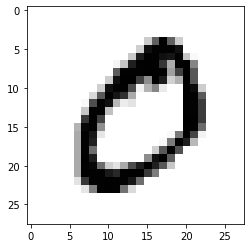

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


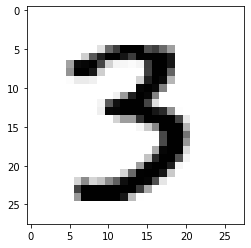

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [7]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0       # norm : normalization한것.
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [8]:
# 밉러닝 모델 생성

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7


In [9]:
# 딥러닝 네트워크 학습시키기전 normalization reshape 처리.
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)    # 채널수 1은 흑백채널의미.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [10]:
# 실제 학습시키는 부분

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2036 - accuracy: 0.9396
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0623 - accuracy: 0.9813
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0457 - accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0361 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0235 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0161 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.012

In [11]:
# 테스트데이터로 성능 확인하기

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0330 - accuracy: 0.9913
test_loss: 0.032965417951345444 
test_accuracy: 0.9912999868392944


In [12]:
#어떤 데이터를 잘못 넣었는지 확인해보기

predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)
print(len(predicted_result))

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])


10000
model.predict() 결과 :  [6.2625012e-09 3.5248075e-11 6.7138572e-08 1.2036921e-05 2.3002043e-10
 3.0338557e-10 1.4552509e-15 9.9998760e-01 7.1301031e-08 2.0125432e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


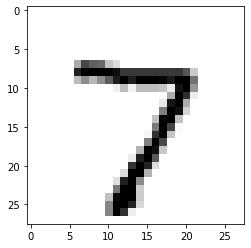

In [13]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [8.28376118e-11 5.52435279e-01 4.23360854e-01 9.75100047e-05
 9.66221342e-06 5.86316995e-09 1.19846424e-11 2.40706541e-02
 2.60696197e-05 2.34503297e-08]
라벨: 2, 예측결과: 1


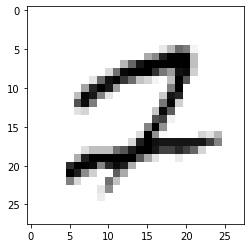

예측확률분포: [1.92239807e-10 6.47529541e-09 1.22186956e-13 1.15198674e-07
 2.71378309e-01 6.65276723e-09 8.10091508e-11 1.07505941e-04
 3.22678752e-05 7.28481770e-01]
라벨: 4, 예측결과: 9


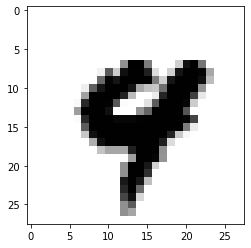

예측확률분포: [1.29665674e-08 1.76204398e-01 1.04232006e-01 4.62531453e-08
 7.14026749e-01 2.45624587e-09 5.53347124e-03 2.00421439e-08
 3.34122888e-06 5.09521203e-10]
라벨: 2, 예측결과: 4


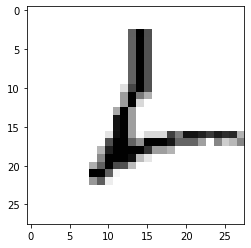

예측확률분포: [5.46621004e-06 6.86612864e-08 2.50711080e-14 5.77028513e-01
 2.93355271e-11 4.22229111e-01 1.06745475e-08 1.19804583e-10
 4.32554032e-07 7.36515038e-04]
라벨: 5, 예측결과: 3


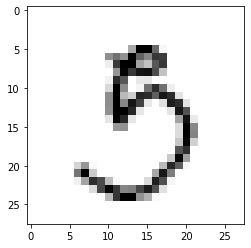

예측확률분포: [7.3501351e-04 2.9382709e-05 9.7225638e-06 1.8900328e-09 8.9374650e-01
 3.9892948e-06 2.8178714e-02 1.7141789e-07 1.1652388e-03 7.6131269e-02]
라벨: 9, 예측결과: 4


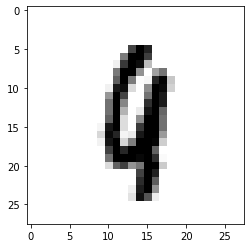

In [14]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()